Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
Hi,  Daniela 
    
    
I am happy to review your project today

    
There are many things that I like
    
- great data preprocessing
- nice code 
- almost all calculations are correct
- amazing visualizations
- I realy love your explanations and conclusions
    
<span class="text-danger"> There are some missing visualization Please add them Also you need to use relevant data period and double check hypotheses testing
    
    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>**General feedback v2**</b> <a class="tocSkip"></a>
    
Hi,  Daniela 
    
Thank you for your corrections Now your project is almost perfect
    
<span class="text-danger"> There is a typo in code for hypotheses testing Please fix it
    
    

<div class="alert alert-block alert-success">
    
<b>**General feedback v3**</b> <a class="tocSkip"></a>
    
Hi,  Daniela 
    
Now your project is perfect
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

# Integrated project


In this project we will be analyzing information on the historic sales of video games: the platform they were made for, their genre, sales by region, esrb rating and both user and critic score.

The objective is to help the ICE store, an online video game store that sales worldwide. We need to identify patters in order to be able to prepare for the 2017 year. 

__Method__

In the first stage we will be preparing the data: dealing with missing values, checking for duplicates, making sure that each column has the correct type of data and creating any relevant additional columns derived from the ones we already have. 

Then, we will proceed to the analysis in order to identify:
-The lifespan of a platform
-Platforms expected to be the most relevant for 2017
-The impact of user and critic score in the total sales for each game
-Genres with the highest and lowest sales
-ESRB ratings with highest and lowest sales
-Preferences by region: platform and genre.

Finally, we will test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same. 
—Average user ratings for the Action and Sports genres are different.



<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great introduction </div>

__Initialization__

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#Reading the database into pandas
df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect We have all necessary data </div>

In [3]:
#Getting a first glimpse at the data
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Applying the info method to get a general idea of the df size, types of data present on it and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Preparing the data

In [5]:
#Obtaining the column names as a list to be able to adjust them to lowercase
columns = df.columns
columns = list(columns)
print(columns)

['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


In [6]:
#Making the list with the column names lowercase and reasigning it back to the df as the actual column names:
for i in range(len(columns)):
  columns[i] = columns[i].lower()
df.columns = columns
#Printing the column names to verify that the adjustment was done correctly:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#Renaming column 'rating' to 'esrb_rating' to make it clearer.
df.rename(columns={'rating': 'esrb_rating'}, inplace=True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb_rating'],
      dtype='object')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done You also can use list comp
    
    df.columns = [i.lower() for i in df.columns]


</div>

I thought it would make sense to change the data type of the 'user_score' to integer type, however, I got an error because some values are strings and can't be changed. I ran the 'value counts' method to get a better understanding of the situation and I discovered that 2,424 cells on that column contain 'tbd' as the value. This will have to be addressed in the future. For now, I won't be changing the data type of any column.

In [8]:
#Result of applying the 'value counts' method to the 'user_score' column:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
2.3       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [9]:
#Looking for duplicates
df.duplicated().sum()

0

In [10]:
#Creating a new column containing the sum of the sales in all regions:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [11]:
#Dealing with missing values in the 'name' column:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [12]:
#Dealing with missing values in the 'genre' column:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


There are two missing values in the name and genre columns, and they are both on the same rows. It seems safe to get rid of these rows.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right decision

In [13]:
#Getting rid of rows contaning missing values on the 'genre' and 'name' columns:
df.dropna(subset=['name'], inplace=True)
#Resetting the index after dropping the rows:
df= df.reset_index(drop=True)
#Confirming that the rows were deleted:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  esrb_rating      9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [14]:
#Dealing with missing values on the 'year_of_release'
missing_year = df[df['year_of_release'].isna()]
missing_year.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
6635,Jonah Lomu Rugby Challenge,PS3,NaN,Sports,0.00,0.19,0.00,0.06,64.0,NaN,E,0.25
14209,Sabre Wulf,GBA,NaN,Platform,0.02,0.01,0.00,0.00,75.0,8,E,0.03
13059,Captain America: Super Soldier,DS,NaN,Action,0.05,0.00,0.00,0.00,NaN,NaN,NaN,0.05
2280,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E,0.92
4204,Tiger Woods PGA Tour 07,Wii,NaN,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E,0.47
10464,Disney's Chicken Little: Ace In Action,Wii,NaN,Shooter,0.09,0.00,0.00,0.01,72.0,tbd,E10+,0.10
12523,Chou Soujuu Mecha MG,DS,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
6179,"The Chronicles of Narnia: The Lion, The Witch ...",GC,NaN,Action,0.22,0.06,0.00,0.01,71.0,tbd,T,0.29
3222,Metal Gear Solid 2: Substance,XB,NaN,Action,0.38,0.22,0.00,0.03,87.0,8.5,M,0.63
6355,Rock Revolution,PS3,NaN,Misc,0.25,0.00,0.00,0.02,42.0,6.6,T,0.27


After getting a sample of rows containing a missing value on the 'year_of_release' column, I discovered that those rows correspond to many different platforms and genres. I decide to replace those values with the median of the values on the same column when grouped by the 'platform' column. The reasoning here is that games released for a particular console will remain in a timeframe according to the lifespan of the platform itself.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Good idea As well you can drop these rows because we have less than 2% of missing values here To check the persentage of NaNs you can use
    
    df.isna().mean()


</div>

In [15]:
#Replacing the missing values on the 'year_of_release' column with the median of the values when grouped by the platform.
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))

#Verifying that there are no empty values on 'year_of_release' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  esrb_rating      9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [16]:
#Getting a glimpse at the rows containing a missing value on the 'critic_score' column:
critic_score = df[df['critic_score'].isna()]
critic_score.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
4613,Super Famista 4,SNES,1995.0,Sports,0.00,0.00,0.42,0.00,NaN,NaN,NaN,0.42
14749,The IdolM@ster: Gravure For You! Vol. 6,PS3,2012.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
11318,S.C.A.R.S,PS,1998.0,Racing,0.05,0.03,0.00,0.01,NaN,NaN,NaN,0.09
13293,Growlanser VI: Precarious World,PS2,2007.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
12162,Titanic Mystery,DS,2010.0,Puzzle,0.05,0.01,0.00,0.01,NaN,tbd,T,0.07
11031,Doraemon: Nobita to Midori no Kyojinden DS,DS,2008.0,Platform,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
9317,Let's Play Ballerina,DS,2010.0,Sports,0.13,0.00,0.00,0.01,NaN,tbd,NaN,0.14
6283,Jikkyou Powerful Pro Yakyuu Portable 4,PSP,2009.0,Sports,0.00,0.00,0.27,0.00,NaN,NaN,NaN,0.27
4010,Cars Mater-National Championship,Wii,2007.0,Racing,0.46,0.00,0.00,0.04,NaN,6.7,E,0.50
9800,Cabela's Dangerous Hunts 2011,DS,2010.0,Sports,0.11,0.00,0.00,0.01,NaN,tbd,T,0.12


In [17]:
#Applying the describe method to get a general impression of the values on the column
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

I discovered that the critic score column rates the videogrames any number from 0 to 100, being 13 the lowest one and 98 the highest one. It also seems like most of the time where there is no critic score, the user score and the esrb rating are also missing.
The mean in general for the column is 68, it wouldn't seem advisable to use the mean to substitute the missing values. 
While analizing the samples of the data with missing values in this column, I realized that it seems like the total sales for those games are pretty low. It seems to me like they are mostly below 1 million USD

In [18]:
#Using the describe method on the 'total_sales' column of the critic_score df to confirm if the values available there are mostly under 1
print(critic_score['total_sales'].describe())
print(critic_score['total_sales'].median())
critic_score['total_sales'].mode()

count    8576.000000
mean        0.385833
std         1.222667
min         0.000000
25%         0.040000
50%         0.120000
75%         0.320000
max        40.240000
Name: total_sales, dtype: float64
0.12


0    0.02
dtype: float64

After looking at some relevant information on the 'total_sales' column on the 'critic_score' df it does seem like a lot of the rows on it made less than one million in sales. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super insight May be because these games were not popular they were not estimated by critics

In [19]:
#Filtering critic_score df to contain only the rows where more than 1 million USD were sold:
cs_overone = critic_score [critic_score['total_sales'] > 1]
cs_overone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 2069
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             708 non-null    object 
 1   platform         708 non-null    object 
 2   year_of_release  708 non-null    float64
 3   genre            708 non-null    object 
 4   na_sales         708 non-null    float64
 5   eu_sales         708 non-null    float64
 6   jp_sales         708 non-null    float64
 7   other_sales      708 non-null    float64
 8   critic_score     0 non-null      float64
 9   user_score       76 non-null     object 
 10  esrb_rating      76 non-null     object 
 11  total_sales      708 non-null    float64
dtypes: float64(7), object(5)
memory usage: 71.9+ KB


In [20]:
#Getting a glimpse at the rows with no critic score but that sold over 1 million USD.
cs_overone.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
1725,Mad Max (2015),PS4,2015.0,Action,0.36,0.59,0.04,0.18,NaN,NaN,NaN,1.17
880,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
1119,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,0.93,0.63,0.00,0.08,NaN,NaN,NaN,1.64
225,The Last of Us,PS4,2014.0,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN,4.72
2045,NBA Jam Tournament Edition,SNES,1995.0,Sports,0.87,0.12,0.00,0.02,NaN,NaN,NaN,1.01
1398,Bravely Default: Flying Fairy,3DS,2012.0,Role-Playing,0.50,0.32,0.49,0.08,NaN,NaN,NaN,1.39
724,Teenage Mutant Ninja Turtles II: The Arcade Game,NES,1990.0,Action,1.74,0.25,0.21,0.03,NaN,NaN,NaN,2.23
1696,Kobe Bryant in NBA Courtside,N64,1998.0,Sports,1.02,0.13,0.04,0.01,NaN,NaN,NaN,1.20
1627,Castlevania,NES,1986.0,Platform,0.54,0.06,0.62,0.01,NaN,NaN,NaN,1.23
1702,Final Fantasy I & II: Dawn of Souls,GBA,2004.0,Role-Playing,0.64,0.24,0.29,0.02,NaN,NaN,NaN,1.19


After the last filter done, the rows with the missing critic score value are only 709 out of 8,578. I have the impression at this point, that it might be good to work only with information of games that sold more than 1 million. Although, I still need to decide how to handle the rest of the missing critic score values. I want to continue doing the analysis before deciding on this part.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
It is more logical to make all analysis step by step and decide what to do with missing values in critic score After you started to analyze user score and it is not good for project structure

In [21]:
#Dealing with the missing values on the 'user_score', starting with the 'tbd' values.
#Creating a df containing only the rows with the 'tbd' value to get an idea of the information present on those rows.
tbd = df [df ['user_score'] == 'tbd']
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 119 to 16704
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2424 non-null   object 
 1   platform         2424 non-null   object 
 2   year_of_release  2424 non-null   float64
 3   genre            2424 non-null   object 
 4   na_sales         2424 non-null   float64
 5   eu_sales         2424 non-null   float64
 6   jp_sales         2424 non-null   float64
 7   other_sales      2424 non-null   float64
 8   critic_score     1082 non-null   float64
 9   user_score       2424 non-null   object 
 10  esrb_rating      2374 non-null   object 
 11  total_sales      2424 non-null   float64
dtypes: float64(7), object(5)
memory usage: 246.2+ KB


In [22]:
tbd['year_of_release'].value_counts()

2009.0    422
2008.0    338
2010.0    332
2011.0    217
2007.0    192
2002.0    192
2005.0    125
2006.0    124
2004.0    111
2003.0    102
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     17
1999.0      8
1997.0      1
1998.0      1
Name: year_of_release, dtype: int64

I was expecting that the tbd values would correspond to newer games, but it doesn't seem like it. As shown on the value counts performed on the 'year_of_release' column of the tbd dataframe. Being so, it doesn't seem like 'tbd' is providing relevant information. I think it can be substituted simply by NaN, so that we can deal with those values like we would on any regular missing value plus we would be able to make the values on the column floats too.

In [23]:
#Replacing 'tbd' value on the 'user_score' column, on the main dataframe, with NaN:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  esrb_rating      9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right I like very luch your explanations You also can check pd.to_numeric method with erros = 'coerce'

In [24]:
#Creating a df containing only rows where the user score is missing:
missing_us = df[df['user_score'].isna()]
missing_us['total_sales'].describe()

count    9123.000000
mean        0.362034
std         1.183052
min         0.000000
25%         0.040000
50%         0.110000
75%         0.290000
max        40.240000
Name: total_sales, dtype: float64

In [25]:
#Filtering this new df so that it contains only the rows where to total sales were over 1 million:
missing_us_overone = missing_us[missing_us['total_sales'] > 1]
missing_us_overone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1 to 2070
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             683 non-null    object 
 1   platform         683 non-null    object 
 2   year_of_release  683 non-null    float64
 3   genre            683 non-null    object 
 4   na_sales         683 non-null    float64
 5   eu_sales         683 non-null    float64
 6   jp_sales         683 non-null    float64
 7   other_sales      683 non-null    float64
 8   critic_score     27 non-null     float64
 9   user_score       0 non-null      object 
 10  esrb_rating      52 non-null     object 
 11  total_sales      683 non-null    float64
dtypes: float64(7), object(5)
memory usage: 69.4+ KB


It has been confirmed that in this case too, if we decided to deal only with games that had over 1 million in sales, we would deal with a considerably lower number of missing values. Still it doesn't seem the best idea to dispose of the rows with empty values since they are too many, and also I don't think a user score or a critic score should be subtituted with anything else because (I'll go with movies because I don't know much about videogames). Movies from the same genre, director and producing company, won't necessarily get the same (or even similar) rating. There are too many factors involved that can't be inferred with a simple code. I could fill the values with something, but it won't be based on real information. I will leave the empty values in the 'critic_score' and 'user_score' as they are. And, if in the future I want to deal with a lesser amount of them, I'll simply work with videogames that sold more than 1 million USD.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect conclusion

Now that we've dealt with the tbd values, we can make the 'user_score' column a numeric data type.

In [26]:
#Converting the 'user_score' to a numeric data type
df['user_score'] = pd.to_numeric(df['user_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  esrb_rating      9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


It would also be relevant to have both columns containing scores, using the same range of possible scores. The 'critic_score' is currently assigning a score from 0 to 100, while the 'user_score' uses only 0 to 10. I'll adjust the 'critic_score' so that it also uses only 1 to 10, by dividing the current score by 10.

In [27]:
#Dividing the values on the 'critic_score' column by 10:
df['critic_score'] = df['critic_score']/10
#Using the describe method to make sure the adjustment was done correctly:
df['critic_score'].describe()

count    8137.000000
mean        6.896768
std         1.393816
min         1.300000
25%         6.000000
50%         7.100000
75%         7.900000
max         9.800000
Name: critic_score, dtype: float64

In [28]:
#Dealing with missing values on the 'esrb_rating' column:
missing_esrb = df[df['esrb_rating'].isna()]
missing_esrb.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
14179,A Game of Thrones: Genesis,PC,2011.0,Strategy,0.00,0.03,0.00,0.01,5.3,4.0,NaN,0.04
13194,Tour de France 2011,X360,2010.0,Racing,0.00,0.04,0.00,0.01,4.6,7.6,NaN,0.05
5983,Dolphin,2600,1983.0,Action,0.27,0.02,0.00,0.00,NaN,NaN,NaN,0.29
8292,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN,0.17
331,Ratchet & Clank: Size Matters,PSP,2007.0,Platform,1.40,1.39,0.10,0.86,NaN,NaN,NaN,3.75
2936,Moto Racer 2,PS,1997.0,Racing,0.39,0.26,0.00,0.05,NaN,NaN,NaN,0.70
14595,Samurai Spirits: Tenkaichi Kenkakuden,PS2,2005.0,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
13169,Detective Conan: Prelude from the Past,DS,2012.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
12970,Katekyoo Hitman Reborn! DS: Shinuki Max! Vongo...,DS,2007.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
5607,Kirby's Block Ball,GB,1995.0,Puzzle,0.00,0.00,0.32,0.00,NaN,NaN,NaN,0.32


I find it interesting that once more, it is common to find that when the esrb rating is missing, the both the user and critic score tend to be missing too. Also, after running the sample method several times, on most occassions, 8 out of 10 rows with the missing value on the esrb column, correspond to videogames that sold less than 1 million USD in total. 

Since we can't infere the esrb rating from other columns accurately, it doesn't seem wise to replace it with any other value. Also, getting rid of the rows is not an options since there are too many rows missing the value. 

The value will be replaced with the 'undefined' string, since we are not dealing with numeric data on this column.

In [29]:
#Replacing missing values on the 'esrb_rating' column with 'undefined'
df['esrb_rating'].fillna('undefined', inplace=True)
#Running info method to confirm the final result after dealing with missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  esrb_rating      16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Bravo! Great primary data preprocessing

### Analyzing the data

__Studying the number of games released per year__

In [30]:
#Grouping the information by the year of release.
games_per_year = df.groupby('year_of_release')['name'].count() 
games_per_year.name = ('number_of_games')
games_per_year.head(10)

year_of_release
1980.0     9
1981.0    46
1982.0    53
1983.0    17
1984.0    14
1985.0    14
1986.0    21
1987.0    16
1988.0    15
1989.0    17
Name: number_of_games, dtype: int64

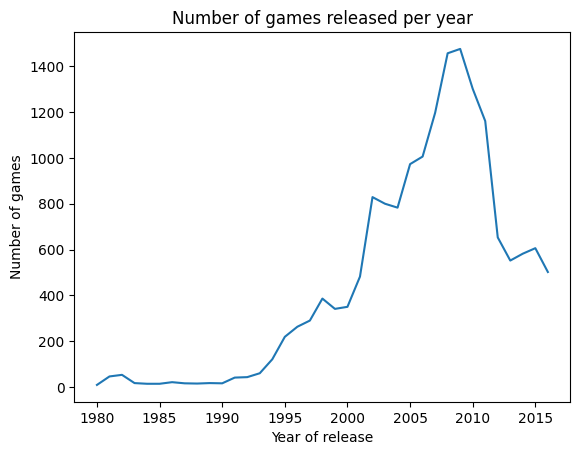

In [31]:
#Creating a lineplot to visualize the information:
games_per_year.plot(x='year_of_release', y='number_of_games', title='Number of games released per year', xlabel='Year of release', ylabel = 'Number of games')

plt.show()

As we can see on the plot, before 1994, the amount of games released per year was below the 3 figures and after that year see can see a mostly steady increase year by year, being 2009 the year with the highest number of released games, with 1,476 games. After 2009, the number decreases every year, ending with 502 games released on 2016.

__Studying the total of sales per platform__

When I was deciding which top sellers I was going to analyze, I decided to use the top six platforms, since they sold so much more than the rest of the platforms. More than twice as much. But I encountered a problem when I tried to visualize the sales per year of the top sellers: it appeared that the Nintendo DS sold 1 videogame on 1985 and then nothing until 2004. I did a little research and the platform was released on 2004 and there were no other platforms called by that name. Also, I checked and the game 'Strongest Tokyo University Shogi DS', was actually released on 2007. I will fix this value manually so that the plot can show the information more clearly.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct

In [32]:
#Identifying the row with the wrong year of release
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


In [33]:
#Modifying its value to be the correct one
df.loc[15955, 'year_of_release'] = 2007

In [34]:
#Verifying that the value was corrected.
df.loc[(df['name'] == 'Strongest Tokyo University Shogi DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,2007.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


After fixing the issue, I can continue with the analysis of the total sales:

In [35]:
#Obtaining the total sales per platform
sales_per_platform = df.groupby('platform')['total_sales'].sum() 
sales_per_platform = sales_per_platform.sort_values(ascending=False)
sales_per_platform.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

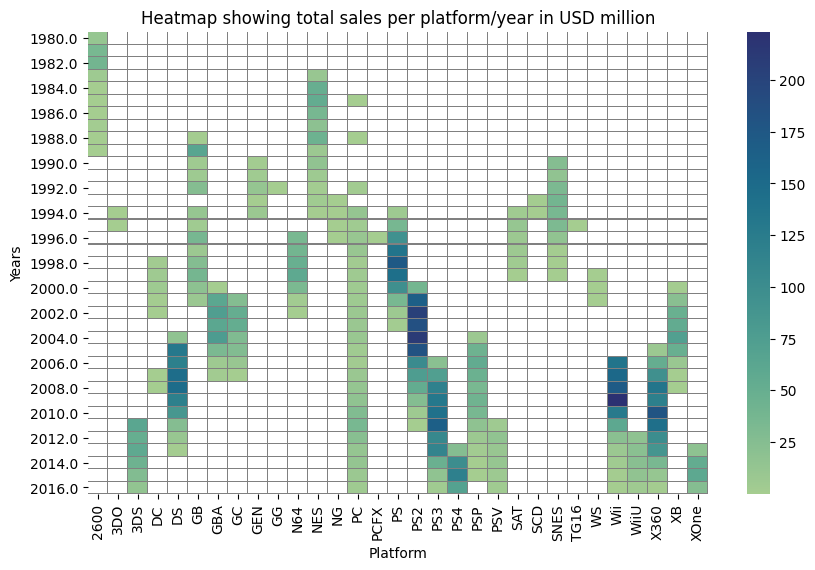

In [36]:
#Creating a pivot table with the information of the total sales of each platform per year
plt.figure(figsize=(10, 6))
pivot_sales_platform = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
#Creating a heatmap to visualize all the information:
hm=sns.heatmap(pivot_sales_platform, cmap = 'crest', linecolor='gray', linewidths=0.05)
plt.title("Heatmap showing total sales per platform/year in USD million")
hm.set(xlabel="Platform", ylabel="Years")
plt.show()

The heatmap shows in one plot a general visualization of the total sales done per platform and per year. We can see how until 1991 there were only up to 4 platforms active each year. But after that year, it started to grow, with an amazing 10 platforms in the market by 1994. You can also see some platforms that didn't last long and made a very low level of sales like the GC, TG16, 3DO and the WS. The tremendous success of the Wii platform on since the year it was lauched is also very clear. No other had ever reached that lever of sales from year one. And as a final comment, the PS4 and the XOne, could be on their way to having great success since they started heating up on year two. The fact that the last year seems to have gotten cooler, might just be due to lack of information for 2016. The 3DS had a very decent start as well, it shouldn be disregarded.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~Here it would be nice to create heatmap and display all values~~

<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 
    
    Thank you for recommending making the heatmap. It really shows how the right visualization can help with getting a much better understanding of the data.

__Identifying the top selling platforms__

In [37]:
#Slicing the 6 top sellers
top_six = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_sellers = pivot_sales_platform[top_six]

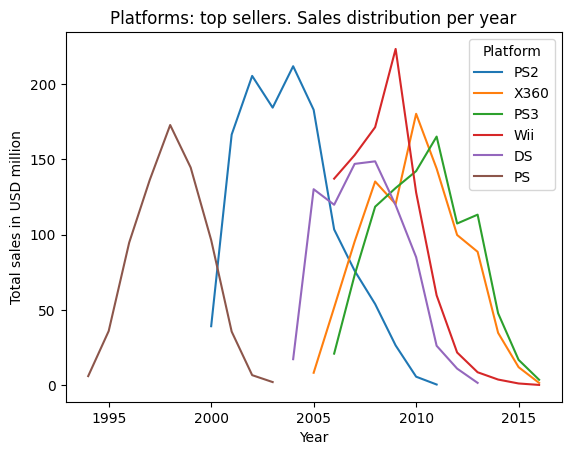

In [38]:
#Creating a plot showing total sales per year of each of the six top selling platforms
top_sellers.plot(title='Platforms: top sellers. Sales distribution per year', xlabel = "Year", ylabel= "Total sales in USD million")
plt.legend(title='Platform')
plt.show()

It is interesting to see that for all six of the top selling platforms, they all seem to have a lifespan of around 10 years, reaching the top of their sales aproximately on the span of 2 - 5 years after their launch. 

I find it also interesting that 3 out of 6 of the top sellers are Play Station platforms. Then two are from Nintendo and one is Xbox. 

Only the PS2 and the Wii sold over 200 million USD. And even though the PS2 is the one that sold more in total because it managed to stay relevant in the market for longer, the Wii is the one that sold more in a particular year yet didn't manage to stay relevant in the market.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Super

__Platform's lifespan__

In [39]:
#Obtaining the lifespan for each platform by counting the number of unique values present on the year_of_release column:
platform_lifespan = df.groupby('platform')['year_of_release'].nunique()
platform_lifespan = platform_lifespan.sort_values(ascending=False)
platform_lifespan.head()

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
Name: year_of_release, dtype: int64

In [40]:
#Using the describe method on the lifespan df to get an idea of the values present on it:
platform_lifespan.describe()


count    31.000000
mean      7.645161
std       5.063256
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: year_of_release, dtype: float64

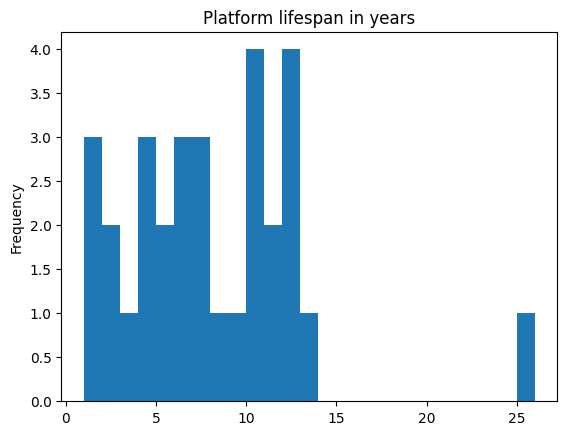

In [41]:
#Plotting a histogram to see the frequency of the platform lifespan values:
platform_lifespan.plot(kind='hist', bins=25, title="Platform lifespan in years")
plt.show()

According to the information obtained, the platforms lifespan goes between 1 and 13 years, with a mean of 7 and a mode of 12 years. It is interesting to see that there is an outlier with 26 years of existence in the market. The name of the platform is 'PC'. It seems like it's referring to games made for computers. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Super calculation of platform lifespan Realy great

__Number of platforms available in the market per year__

In [42]:
#Obtaining the number of platforms available per year according to the games released for them:
platforms_per_year = df.groupby('year_of_release')['platform'].nunique()
print(platforms_per_year.describe())
platforms_per_year.mode()

count    37.000000
mean      6.405405
std       3.175072
min       1.000000
25%       4.000000
50%       7.000000
75%       9.000000
max      11.000000
Name: platform, dtype: float64


0     8
1     9
2    10
dtype: int64

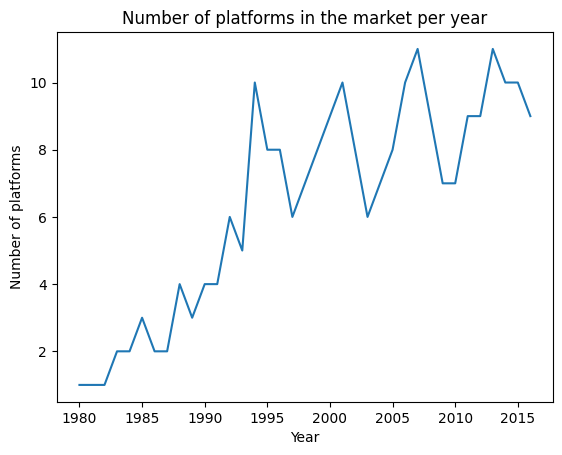

In [43]:
#Plotting the information
platforms_per_year.plot(xlabel='Year', ylabel='Number of platforms', title='Number of platforms in the market per year')
plt.show()

It seems like in general, the number of active platforms in the market ranges from 6 to 11. Peaking every 5-6 years.

__Total sales of videogames on all regions__

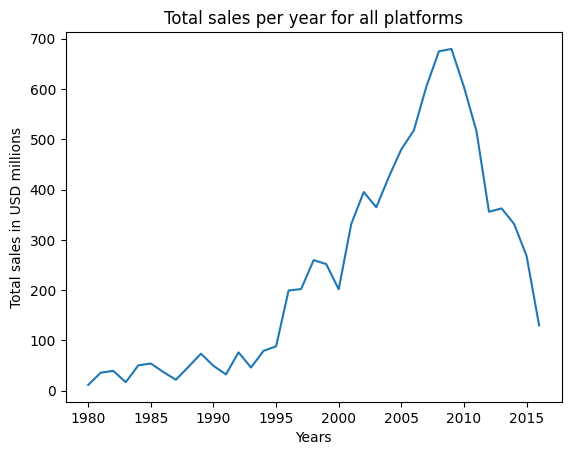

In [44]:
#Total sales on all regions and all platforms per year
global_sales = df.groupby('year_of_release')['total_sales'].sum()
global_sales.plot(title='Total sales per year for all platforms', xlabel = 'Years', ylabel= 'Total sales in USD millions')
plt.show()

In order to be able to define which years are the ones that provide the most relevant information, I created a couple extra plots. The first one shows the lifespan of any platform. It seems you can expect any average platform to have a life of between 7 to 12 years. Also, new platforms emerge aproximately every 5 years. This is apparent in the full length of the pivot table showing the total sales per platform/year, as well as the plot showing the top selling platforms. 

In regards to the industry as a general, after 1994, the number of video games released started to increase considerably, peaking between 2005 and 2010. These numbers match the total sales for all platforms. The total sales increased greatly after 1995 and peaked between 2005 and 2010. Both of these plots show that sales and number of games realeased have been decreasing since 2011. This might be due to the introduction and greater acceptance of digital games vs physical games.

The number of platforms available each given year tends to stay regular, having between 7 to 11 platforms in the market every  year. 

__Creating a model for 2017__

According to the previous analysis, platforms tend to peak between the year 2 and 5 after their lauch. On their first year they start low in sales, then they peak, and then their sales tend to decrease after the 5 years.

I would like to study the behavior of platforms launched on or after 2011. 

In [45]:
#Obtaining the year each platform was launched according to the oldest game released for it.
recent_platforms = df.groupby('platform')['year_of_release'].min()
recent_platforms = recent_platforms.sort_values(ascending=False)
recent_platforms.head(10)

platform
XOne    2013.0
PS4     2013.0
WiiU    2012.0
3DS     2011.0
PSV     2011.0
PS3     2006.0
Wii     2006.0
X360    2005.0
PSP     2004.0
DS      2004.0
Name: year_of_release, dtype: float64

According to this, there are only 5 platforms relevant for the 2017 model: XOne, PS4, WiiU, 3DS and PSV. These platforms were released on or after 2011, the rest of them were released on or before 2006.

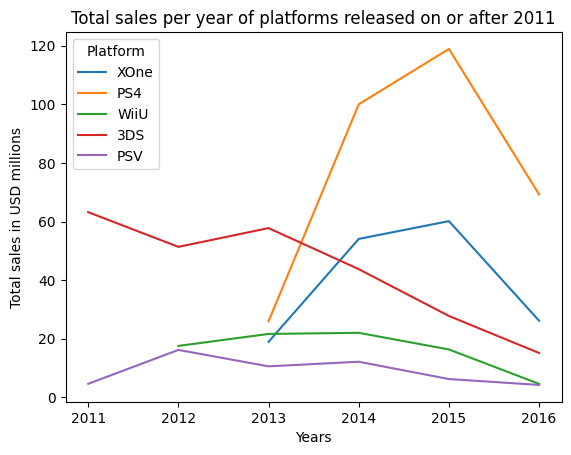

In [46]:
#Sales per year of the selected platforms
top_recent = ['XOne', 'PS4', 'WiiU', '3DS', 'PSV']
recent_sales = pivot_sales_platform[top_recent]
recent_sales.plot(title='Total sales per year of platforms released on or after 2011', xlabel = 'Years', ylabel= 'Total sales in USD millions')
plt.legend(title='Platform')
plt.show()

Just out of curiosity, I'll check platforms released from 2004 to 2010, just to confirm that they behave as expected and that I am not missing any platform that stayed relevant for that time.

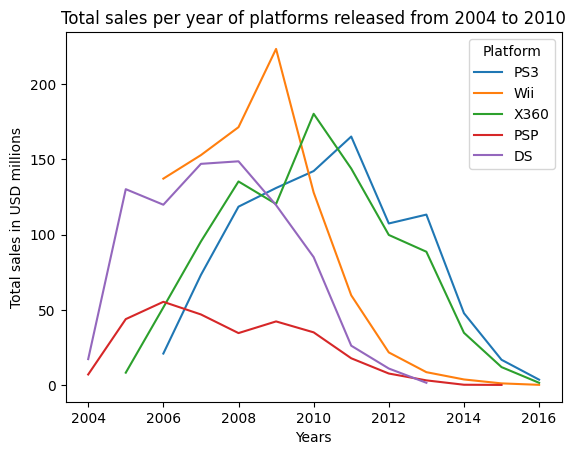

In [47]:
not_recent = ['PS3', 'Wii', 'X360', 'PSP', 'DS']
not_recent_sales = pivot_sales_platform[not_recent]
not_recent_sales.plot(title='Total sales per year of platforms released from 2004 to 2010', xlabel = 'Years', ylabel= 'Total sales in USD millions')
plt.legend(title='Platform')
plt.show()

According to these last plots, it seems like as expected, any platform released before 2011, is not making any or nearly any sales by 2016, so it's not expected to generate any relevant sales for 2017.

At the same time, while studying the platforms released on or after 2011, the only platforms that are making any relevant sales by 2016 are the PS4 and the XOne. If a third platform should be considered, it could be the 3DS, it is still active and selling but the sales are expected to continue dropping. Although, the low numbers at the end of the plot, could be due to missing information for the full year 2016. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Everything is correct

In [48]:
#Filtering information for the PC platform.
pc_sales = df[df['platform']=='PC']
pc_sales = pc_sales.groupby('year_of_release')['total_sales'].sum()
pc_sales.head()

year_of_release
1985.0     0.04
1988.0     0.03
1992.0     3.03
1994.0    12.87
1995.0     4.22
Name: total_sales, dtype: float64

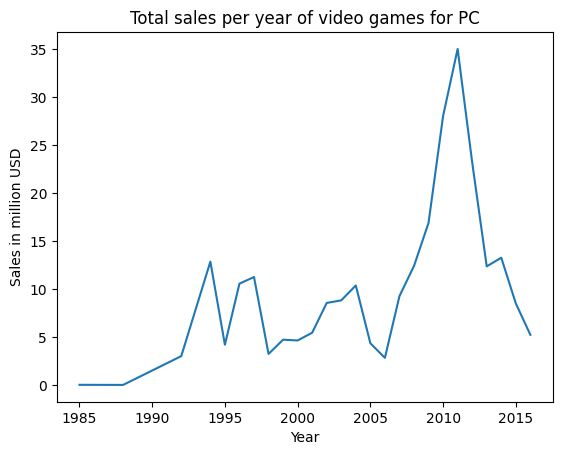

In [49]:
#Plotting the total sales per year for this platform. 
pc_sales.plot(title= 'Total sales per year of video games for PC', xlabel='Year', ylabel='Sales in million USD')
plt.show()

I created an extra plot for the total sales of the PC platform since due to the way the recent platforms were chosen, any relevant sales for PC wouldn't show. Because it has stayed with the same name since they started collecting the data. 

It does seem like in general PCs are becoming more relevant and have a tendency to grow. 

__Global sales per platform__

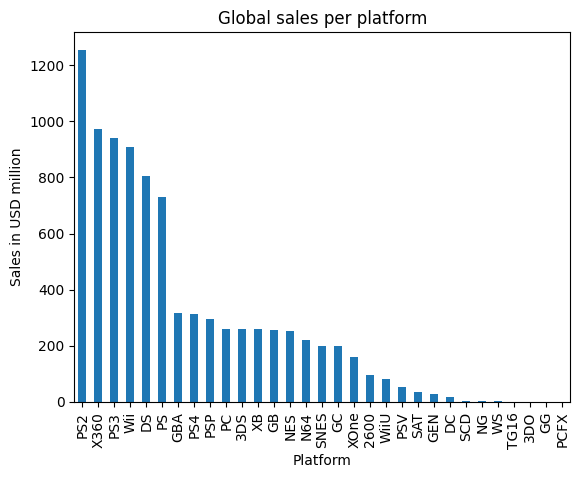

In [50]:
#Creating a plot showing the total sales per platform
global_platforms = df.groupby('platform')['total_sales'].sum()
global_platforms.sort_values(ascending=False, inplace=True)
global_platforms.plot(kind='bar', title='Global sales per platform', xlabel='Platform', ylabel='Sales in USD million')
plt.show()

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~It is better to sort bars here~~

This plot shows that the PS2, X360, PS3, Wii, DS and PS, are the top sellers, and also their sales have no comparison with the rest of the platforms.

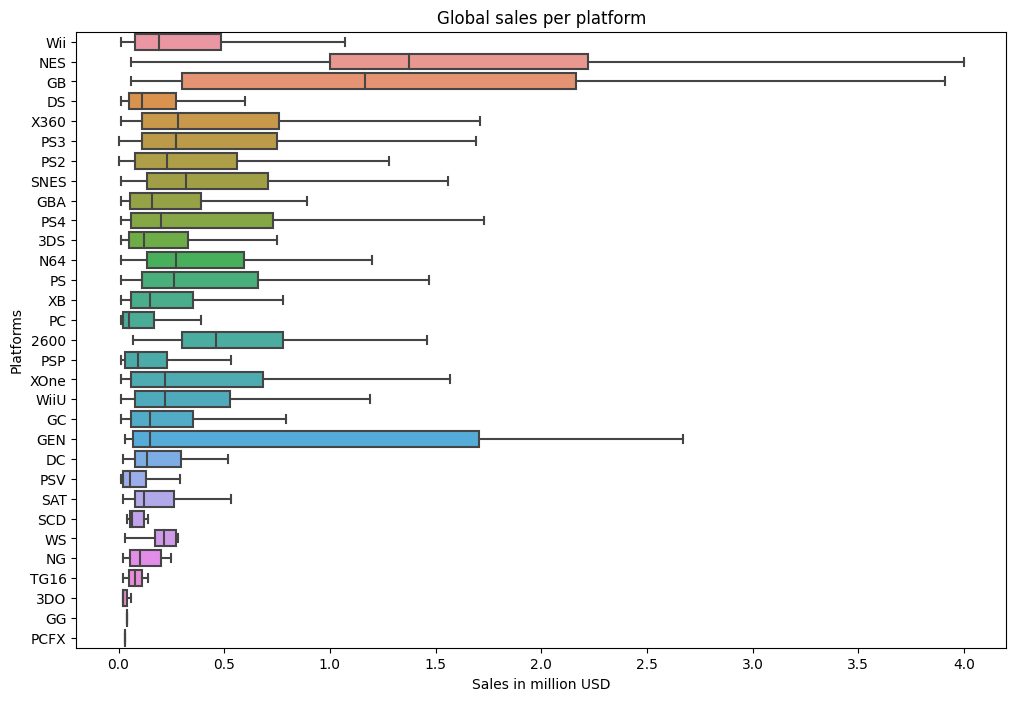

In [51]:
#Creating a box plot showing the total sales per platform
plt.figure(figsize=(12, 8))

sns.boxplot(x='total_sales', y='platform', data=df, showfliers = False, orient='h').set_title('Global sales per platform')
plt.xlabel("Sales in million USD")
plt.ylabel('Platforms')

plt.show()

With this plot we can see that in average the sales per game on the NES and GB platforms, were much higher than the rest of the platforms. The 2600 platform also did better than most of the platforms. 

This plot provides new information, the games with the highest average sales don't match the top selling platforms identified previously, in this case: they correspond to the GB and the NES platforms, both by Nintendo. In average, games for the GB and the NES sold much more than the games released for other platforms. It seems like these platforms have historic relevance.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
The best boxplots I have ever seen

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~According to the brief starting from this step you need to choose right relevant period and carry out all analysis for this period It should not be very short and very long Normaly you can analyze the latest 3-4 years All further steps inscluding correlation analysis, region profile and hypotheses testing should be done for this relevant period~~ </div>

__Selecting the relevant period__

For the rest of this analysis, we will only be considering information starting in 2013, in order to focus on the relevant data for the upcoming year.

In [52]:
#Creating a new dataframe containing only the rows of games released on or after 2013.
rd = df[df['year_of_release']>=2013]
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 16 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2242 non-null   object 
 1   platform         2242 non-null   object 
 2   year_of_release  2242 non-null   float64
 3   genre            2242 non-null   object 
 4   na_sales         2242 non-null   float64
 5   eu_sales         2242 non-null   float64
 6   jp_sales         2242 non-null   float64
 7   other_sales      2242 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1196 non-null   float64
 10  esrb_rating      2242 non-null   object 
 11  total_sales      2242 non-null   float64
dtypes: float64(8), object(4)
memory usage: 227.7+ KB


Out of 16715 rows, we are left with only 2242 rows for te rest of the analysis.

__Correlation between user/critic score and the total sales for recent top sellers

Here I will be analyzing the effect that both the user and critic score have on the total sales. For that matter, I will be studying the PS4 and the XOne. Both are doing pretty good recently, however, the PS4 is having a bigger success. I would like to see if there are any differences in the scores that their games have received. 

In [53]:
#Filtering information for the PS4 platform
ps4 = rd[rd['platform']=='PS4']
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16583
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    float64
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  esrb_rating      392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(8), object(4)
memory usage: 39.8+ KB


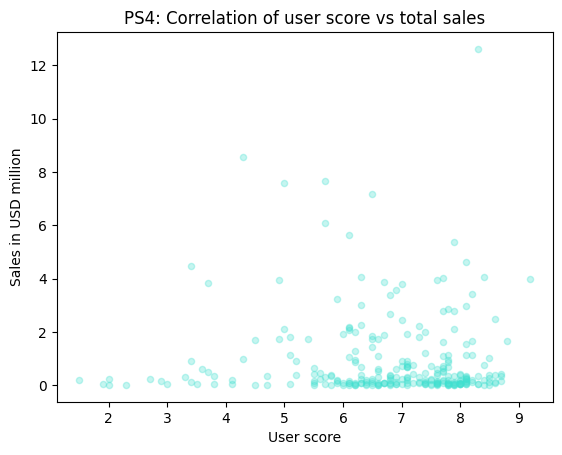

In [54]:
#Creating a scatter plot comparing the user score and the sales per game for the DS platform:
ps4.plot(x='user_score', y='total_sales', kind='scatter', xlabel='User score', ylabel='Sales in USD million', title='PS4: Correlation of user score vs total sales', alpha = 0.3, color='#40e0d0')
plt.show()

In [55]:
#Obtaining the correlation coefficient for user score vs total sales for the PS4 platform
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556424

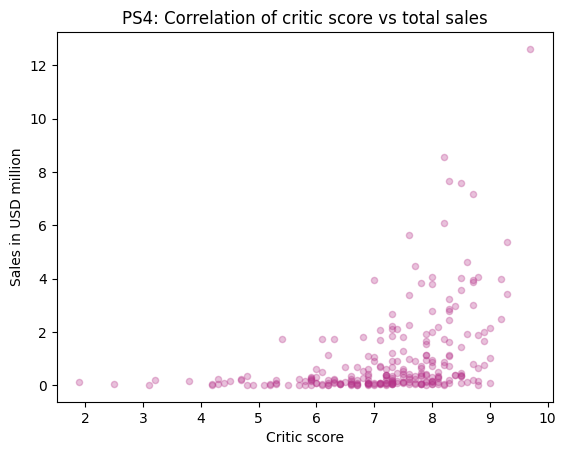

In [56]:
#Scatter plot comparing the critic score and the sales per game for the PS4 platform:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', xlabel='Critic score', ylabel='Sales in USD million', title='PS4: Correlation of critic score vs total sales', alpha = 0.3, color='#b53389')
plt.show()

In [57]:
#Obtaining the correlation coefficient for critic score vs total sales for the PS4 platform
ps4['critic_score'].corr(ps4['total_sales'])

0.4065679020617811

In [58]:
ps4['user_score'].describe()

count    257.000000
mean       6.748249
std        1.459481
min        1.500000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

In [59]:
ps4['critic_score'].describe()

count    252.000000
mean       7.209127
std        1.248599
min        1.900000
25%        6.600000
50%        7.300000
75%        8.000000
max        9.700000
Name: critic_score, dtype: float64

In [60]:
#Filtering information for the XOne platform
xones = rd[rd['platform']=='XOne']
xones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  esrb_rating      247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


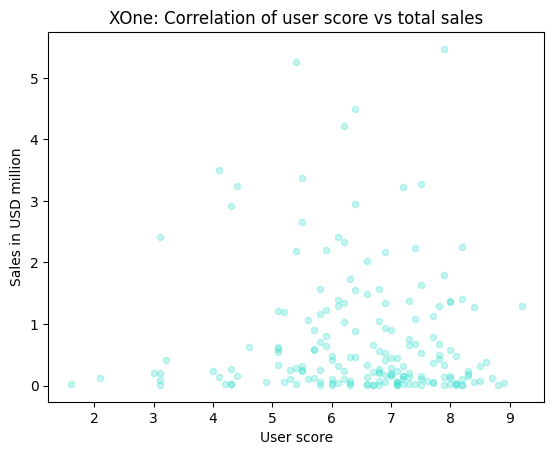

In [61]:
#Creating a scatter plot comparing the user score and the sales per game for the XOne platform:
xones.plot(x='user_score', y='total_sales', kind='scatter', xlabel='User score', ylabel='Sales in USD million', title='XOne: Correlation of user score vs total sales', alpha = 0.3, color='#40e0d0')
plt.show()

In [62]:
#Obtaining the correlation coefficient for user score vs total sales for the XOne platform
xones['user_score'].corr(xones['total_sales'])

-0.06892505328279414

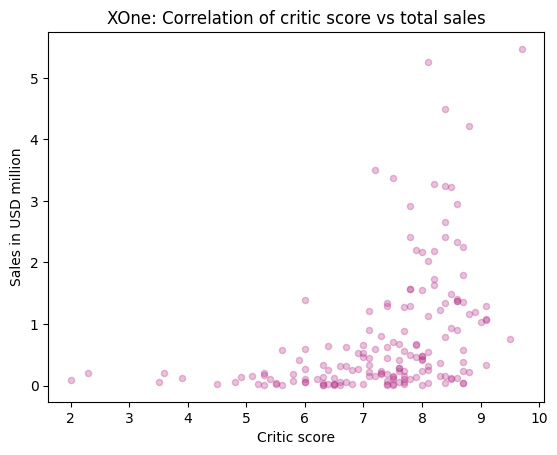

In [63]:
#Scatter plot comparing the critic score and the sales per game for the XOne platform:
xones.plot(x='critic_score', y='total_sales', kind='scatter', xlabel='Critic score', ylabel='Sales in USD million', title='XOne: Correlation of critic score vs total sales', alpha = 0.3, color='#b53389')
plt.show()

In [64]:
#Obtaining the correlation coefficient for user critic vs total sales for the XOne platform
xones['critic_score'].corr(xones['total_sales'])

0.4169983280084022

In [65]:
xones['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [66]:
xones['critic_score'].describe()

count    169.000000
mean       7.332544
std        1.295347
min        2.000000
25%        6.600000
50%        7.600000
75%        8.200000
max        9.700000
Name: critic_score, dtype: float64

For both platforms, the user score shows a very weak -close to 0-negative correlation with sales. This is very clear on the PS4 user score plot: there are a lot of markers concentrated with a 6-8 user score and sales close to 0.

On the other hand, for both platforms, the critic score has a correlation coefficient of around 40, which means there is a moderate correlation. The critic score does seem to have some influence in the sales. Keeping an eye on games obtaining good scores by the critics, could be part of the strategy to define the games that are worth investing on doing marketing strategies for.

Regarding the difference in sales of the two platforms, the mean of the critic score for the XOne platform is actually higher than the one for the PS4. XOne's is at 7.3 while the PS4's is at 6.3. 1 whole point out of ten seems relevant. However, the PS4 is doing much better in sales. Both platforms were released on 2013, yet the PS4 games have sold so far 314.14 USD millions while the XOne is at 159.32 USD million in the same timeframe. The user and critic's score doesn't seem to be what is making the difference here.

From 2013 to 2016, there were 392 games released for the PS4 while for the XOne there were 247. The amount of games released per platform must have to do with the difference in total sales done by each game's platforms.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Right conclusion for correlation Just please use more recent platforms to prove that critic score has greater impact on total sales than user score

__Sales of the same game on different platforms__

In [67]:
#Filtering the dataframe to keep only rows were the name value is duplicated
duplicates = rd['name'].duplicated(keep=False)
duplicate_rows = rd[duplicates]
duplicate_rows = duplicate_rows.sort_values(by='name')
duplicate_rows.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,undefined,0.59
3861,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,undefined,0.51
4549,2014 FIFA World Cup Brazil,X360,2014.0,Sports,0.15,0.25,0.00,0.03,7.4,4.4,E,0.43
3270,2014 FIFA World Cup Brazil,PS3,2014.0,Sports,0.15,0.36,0.01,0.09,7.3,4.3,E,0.61
7889,3rd Super Robot Wars Z Jigoku Hen,PSV,2014.0,Role-Playing,0.00,0.00,0.19,0.00,NaN,NaN,undefined,0.19
7115,3rd Super Robot Wars Z Jigoku Hen,PS3,2014.0,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,undefined,0.23
8819,3rd Super Robot Wars Z: Tengoku-Hen,PS3,2015.0,Action,0.00,0.00,0.15,0.00,NaN,NaN,undefined,0.15
7881,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2015.0,Action,0.00,0.00,0.19,0.00,NaN,NaN,undefined,0.19
12862,7 Days to Die,XOne,2016.0,Action,0.03,0.02,0.00,0.00,3.5,5.2,M,0.05
9196,7 Days to Die,PS4,2016.0,Action,0.04,0.08,0.00,0.02,4.5,5.9,M,0.14


In [68]:
#Creating a pivot table to be able to compare the sales of the same game on different platforms and getting the total sales per game
pd.options.mode.chained_assignment = None 
pivot_same_game = duplicate_rows.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc='sum', margins=True, margins_name = 'total_sales')
pivot_same_game = pivot_same_game.sort_values(by='total_sales', ascending=False)
#Creating a new dataframe containing only the top 7 selling games
top_games = pivot_same_game.iloc[1:8]
#Dropping columns where all values are NaN
top_games.dropna(axis=1, how='all', inplace=True)
top_games = top_games.drop('total_sales', axis=1)
top_games

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,NaN,NaN,16.27,5.47
Call of Duty: Ghosts,NaN,0.69,9.36,3.83,NaN,NaN,NaN,0.35,10.24,2.92
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.70,7.39
Minecraft,NaN,NaN,5.27,4.32,NaN,1.96,NaN,0.67,9.18,2.76
Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,NaN,NaN,NaN,NaN,4.28,5.26
FIFA 15,0.46,0.29,4.28,6.08,NaN,0.60,0.56,NaN,2.92,2.18
FIFA 14,0.23,0.40,6.46,3.01,0.19,0.41,0.38,NaN,4.22,1.16


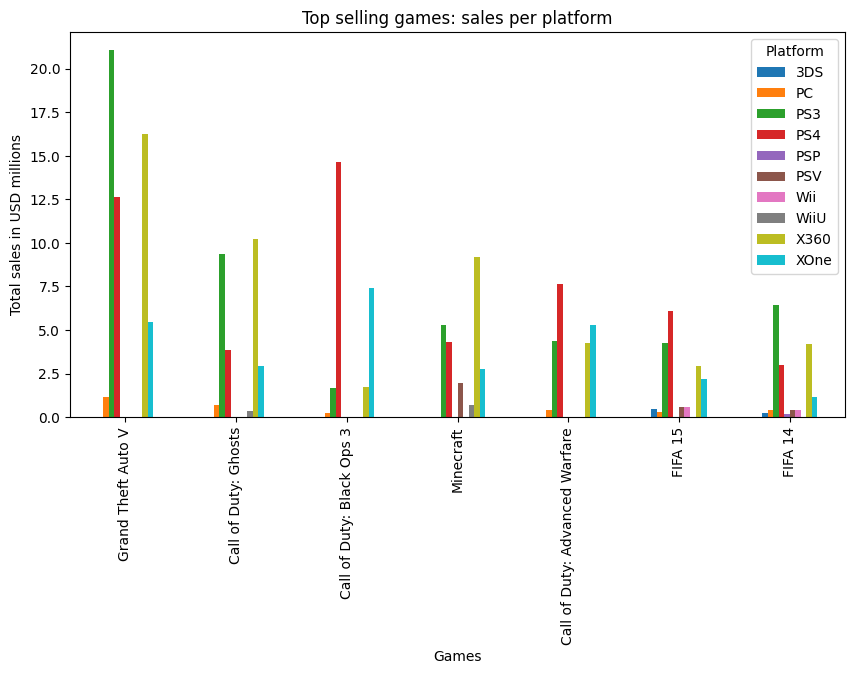

In [69]:
top_games.plot(kind='bar', title='Top selling games: sales per platform', xlabel = 'Games', ylabel= 'Total sales in USD millions', figsize=[10,5])
plt.legend(title='Platform')
plt.show()

By comparing the sales of the same game on different platforms we can see that the same game has considerably different sales from platform to platform. The PS3, X360 and the PS4 and the ones that appear as the higher sales for all of the top selling games. With a couple of occurences of the XOne. Having this way presence of the two top selling platforms a generation before the current one and the two top selling platforms of the current generation. 

Both of the Wii platforms are selling very small amounts and aren't present in all of the games. We mentioned before that even though the Wii was one of the top selling platforms, it didn't managed to stay relevant for long. It was released on 2006, same year as the PS3 and one year after the X360. Both the X360 and the PS3 are present on all of the top selling games released on or after 2013. Could it be that the Wii didn't stay relevant because they didn't adapt the top selling games to the platform? 

In regards to the handheld platforms, these games don't seem to have very relevant sales on those platforms. Maybe there are specific games for those platforms. Would make sense because the format and situation of use is very different.

The PCs are present in 6 out of 7 games but also, are not very representative in terms of sales. I'm thinking that also, there must be specific games for it, or is a different type of consumer.

Finally, in regards to the games themselves, 3 out of the 7 top sellers, are from the Call of Duty franchise and 2 are FIFA games. It would be advisable to keep them on stock.

In terms of genre, we have 3 shooter, 2 sports, 1 misc and 1 action. The action being the top of the top selling games.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Perfect

__Distribution by genre__

In [70]:
#Grouping the information by genre to obtain the total number of games per genre as well as their total sales.
genre_dist = rd.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'})
genre_dist = genre_dist.sort_values(by='total_sales', ascending=False)
genre_dist.rename(columns={'name': 'number_of_games'}, inplace=True)
genre_dist.head(20)

               

,number_of_games,total_sales
genre,,
Action,767,322.27
Shooter,188,233.05
Sports,215,150.67
Role-Playing,294,146.18
Misc,155,62.82
Platform,74,42.63
Racing,86,39.98
Fighting,80,35.31
Adventure,246,23.73


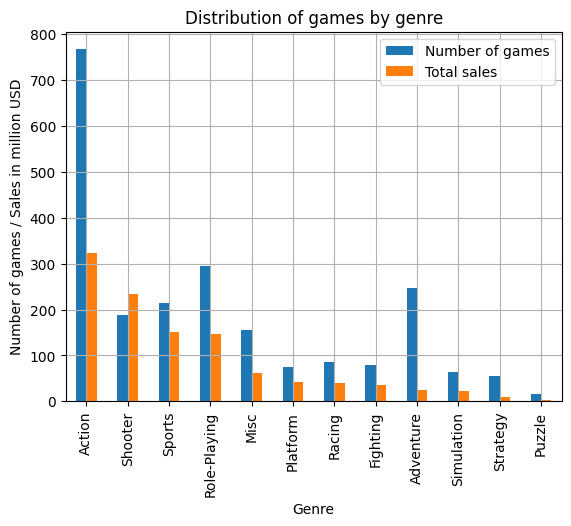

In [71]:
#Creating a plot showing the information obtained.
genre_dist.plot(kind='bar', title='Distribution of games by genre', xlabel='Genre', ylabel='Number of games / Sales in million USD')
plt.legend(['Number of games', 'Total sales'])
plt.grid(True)
plt.show()

On this plot we can see that in general the total sales are determined by the amount of games released. We can also see that in general there are more games released for the action, role-playing, adventure, sports and shooter, in that order.

But the top sellers are action, shooter, sports, role-playing and misc. 

It seems like there were too many games released for the adventure genre but it didn't go great in terms of sales. And on the other hand, the average of sales per game must be much higher than the rest of the genres.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please correct y title Here we have total sales and number of games in the same time~~ </div>

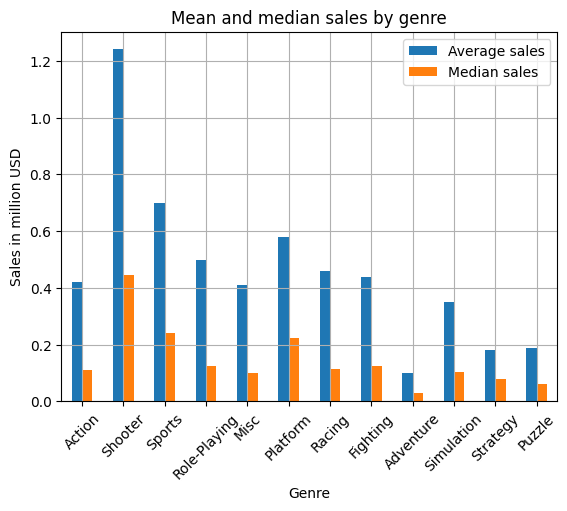

In [72]:
#Plotting average and median sales per genre:
genre_dist['average_sales']=(genre_dist['total_sales'])/(genre_dist['number_of_games'])
genre_dist['average_sales']=genre_dist['average_sales'].round(2)
genre_dist['median_sales'] = rd.groupby('genre')['total_sales'].median()
genre_dist.plot(kind='bar', y=['average_sales', 'median_sales'], rot=45, title='Mean and median sales by genre', xlabel='Genre', ylabel='Sales in million USD')
plt.legend(['Average sales', 'Median sales'])
plt.grid(True)
plt.show()

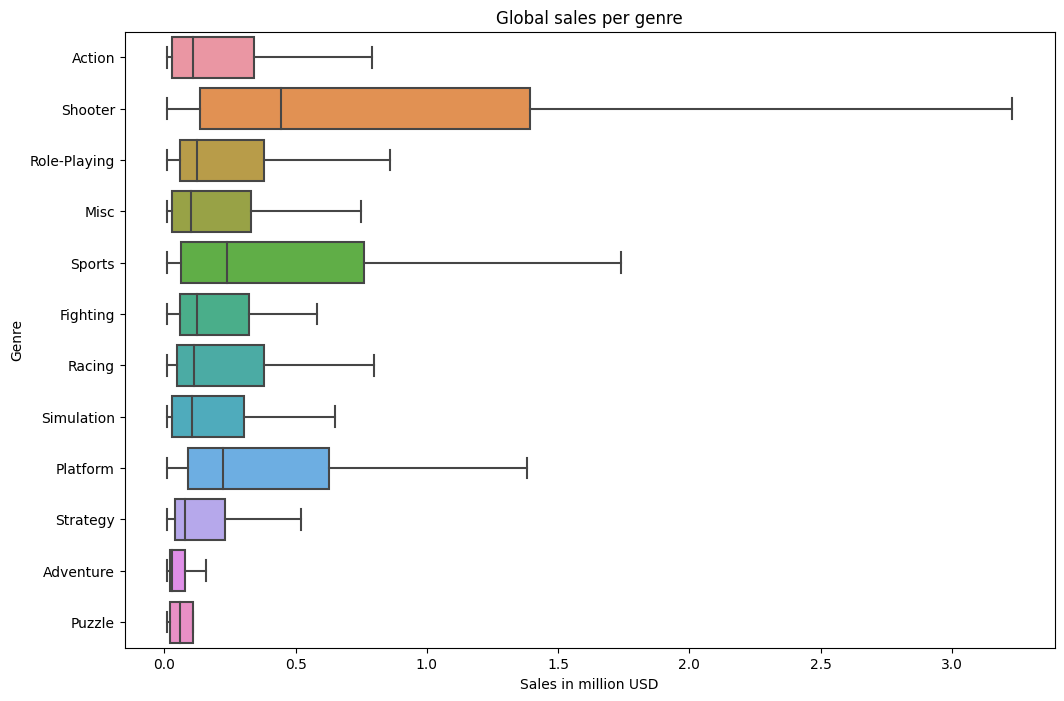

In [73]:
#Creating a box plot showing the total sales per genre
plt.figure(figsize=(12, 8))

sns.boxplot(x='total_sales', y='genre', data=rd, showfliers = False, orient='h').set_title('Global sales per genre')
plt.xlabel("Sales in million USD")
plt.ylabel('Genre')

plt.show()

The 5 top selling genres and also with more games available are: action, shooter, sports, role-playing and misc. In that order.

Also, when comparing the amount of sales that each game made in average and the median per genre, the ones that come on the top are:  shooter, sports, platform, role-playing, and racing.

As expected, shooter is the one that did best is the shooter genre while adventure did the worst.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Very nice and deep analysis Please add boxplots for total sales broken by genres to make it more detailed~~</div>

__Creating a user profile for each region__

In [74]:
#Creating a new dataframe with the total of sales per platform/region:
sales_region = rd.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'})
sales_region

,na_sales,eu_sales,jp_sales
platform,,,
3DS,39.04,31.17,67.86
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.15,6.15,18.66
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


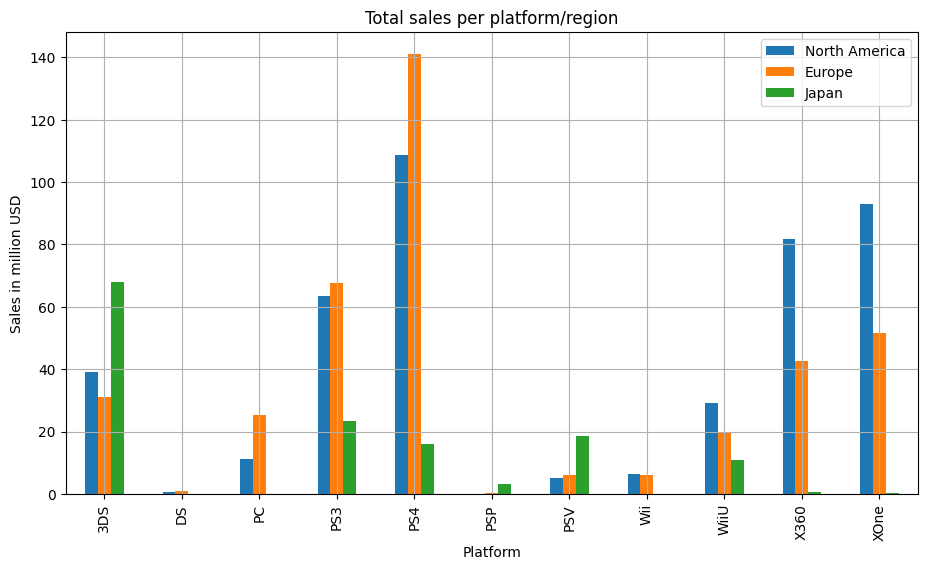

In [75]:
#Plotting the information of sales per platform/region
sales_region.plot(kind='bar', rot=90, figsize=[11,6], title='Total sales per platform/region', xlabel= 'Platform', ylabel='Sales in million USD')
plt.grid(True)
plt.legend(['North America', 'Europe', 'Japan'])
plt.show()

The top 5 selling platforms per region are as follows:

North America: PS4, XOne, X360, PS3 and 3DS.
2 Xbox, 2 Play Station, 1 Nintendo.
1 handheld device.

Europe: PS4, PS3, XOne, X360, 3DS (Different order, but exactly the same as North America)
2 Xbox, 2 Play Station, 1 Nintendo.
1 handheld devices.

Japan: 3DS, PS3, PSV, PS4, WiiU
2 Nintendo and 3 Play Station. 0 Xbox.
2 handheld devices and one hybrid device (since the WiiU can be used in both ways).

Some relevant conclusions could be, that Europe has a lot of things in common with the North America market. They share the same top 5 selling platforms. And within them we find the 2 top selling platforms of the current generation and the ones for the previous one. However, They seem to prefer the PlayStation consoles over the Xbox ones. Both of them have one handheld device among the top sellers.

On the other hand, Japan is clearly much more interested in handheld devices and don't seem to care much for the Xbox ones. Would it be hard to find it there? Although it seems that both the Play Station and the Nintendo were originated in Japan. Maybe they just prefer to support their local companies.


In [76]:
#Creating a dataframe containing the total sales per genre/region.
genre_region = rd.groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'})
genre_region

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.23,118.32,40.49
Adventure,7.22,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,13.04,20.19,2.30
Role-Playing,46.51,37.02,51.14
Shooter,109.78,87.88,6.61


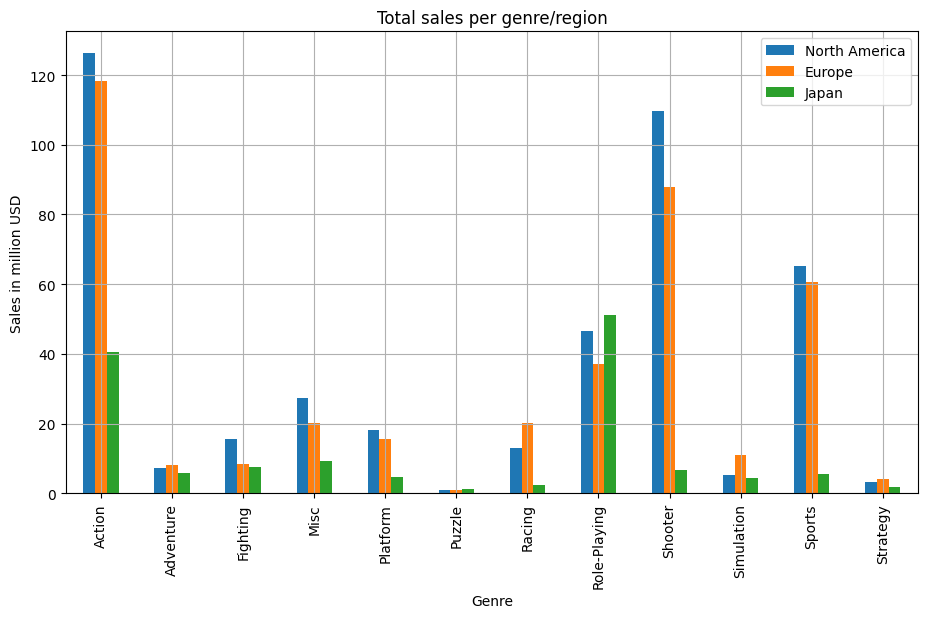

In [77]:
#Plotting the information of sales per genre/region
genre_region.plot(kind='bar', rot=90, figsize=[11,6], title='Total sales per genre/region', xlabel= 'Genre', ylabel='Sales in million USD')
plt.grid(True)
plt.legend(['North America', 'Europe', 'Japan'])
plt.show()

The top selling genres per region are:

North America: action, shooter, sports, role-playing and misc.
Europe: action, shooter, sports, role-playing and racing.
Japan: role-playing, action, misc, fighting and shooter.

Action, sports and role-playing are among the top sellers for all regions. 
Shooter is very relevant in North America and Europe, but is less relevant for Japan.
Racing is a relevant genre in Europe, but is not as relevant in North America and not at all for Japan.

In [78]:
#Creating a dataframe containing the total sales per esrb genre/region.
esrb_region = rd.groupby('esrb_rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'})
esrb_region

,na_sales,eu_sales,jp_sales
esrb_rating,,,
E,79.17,83.38,15.14
E10+,54.50,42.88,5.89
M,165.21,145.32,14.11
T,50.08,42.00,20.66
undefined,89.70,78.91,85.10


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please dont drop 'undefined' May be in some regions we dont need to have esrb_rating and games can be solde without it~~</div>

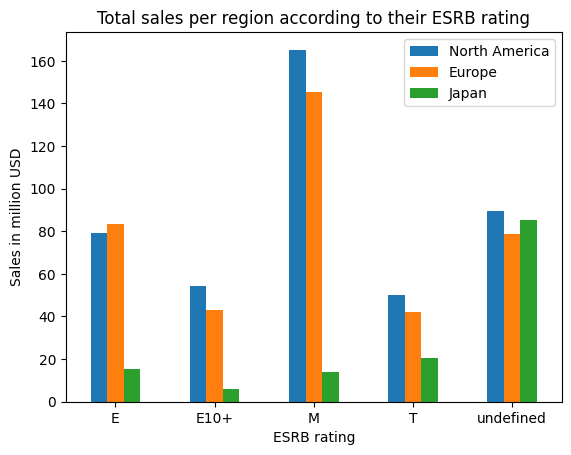

In [79]:
#Creating a plot showing the sales per esrb rating/region
esrb_region.plot(kind='bar', title='Total sales per region according to their ESRB rating', xlabel='ESRB rating', ylabel='Sales in million USD', rot=0)
plt.legend(['North America', 'Europe', 'Japan'])
plt.show()

In general, it tends to seem like Europe region behaves similarly to the North America region.

In this case, it is so, the top selling games have and ESRB rating of M(mature) for ages 17 and older -dominating the market, then followed by E(everyone), undefined, E10+(ages 10 and older) and finally T(teen). 

This would mean that the market for these products is composed mainly by adults. It makes sense for the part that it is an expensive hobbie. Then, the undefined is top 2-3 in the two mentioned areas. I'm inclined to think that if they are undefined, they can definitely be consumed by adults, but not necessarily younger people. Pointing once more to a more mature audience.

In regards to Japan, the games with the highest sales have an undefined ESRB rating, then it's followed by the T(teens), E and M. Could it be that Japan sales regional games and disregard on the ESRB rating? Also, for the rest, the market seems to be more leaned to a general audience. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
In general you have great visualizations and code here Please correct conclusion if it is necessary for rating And dont forget to analyze only relevant period

### Testing hypotheses

__Average user ratings of the Xbox One and PC platforms are the same__

In [80]:
#Here we will be using the df created previously containing only information for XOne platform
#Dropping rows where the user score is missing
xones.dropna(subset=['user_score'], inplace=True)
xones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16658
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    float64
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       182 non-null    float64
 10  esrb_rating      182 non-null    object 
 11  total_sales      182 non-null    float64
dtypes: float64(8), object(4)
memory usage: 18.5+ KB


In [81]:
#Creating a new dataframe containing information only for PC:
pc = rd[rd['platform']=='PC']
#Dropping rows where the user score is missing
pc.dropna(subset=['user_score'], inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 458 to 16690
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             155 non-null    object 
 1   platform         155 non-null    object 
 2   year_of_release  155 non-null    float64
 3   genre            155 non-null    object 
 4   na_sales         155 non-null    float64
 5   eu_sales         155 non-null    float64
 6   jp_sales         155 non-null    float64
 7   other_sales      155 non-null    float64
 8   critic_score     148 non-null    float64
 9   user_score       155 non-null    float64
 10  esrb_rating      155 non-null    object 
 11  total_sales      155 non-null    float64
dtypes: float64(8), object(4)
memory usage: 15.7+ KB


In [82]:
# Testing the hypotheses
print('The average user score for Xbox One is:', xones['user_score'].mean().round(2))
print('The average user score for PCs is:', pc['user_score'].mean().round(2))
print('The standard deviation for the user score for Xbox One is:', np.std(xones['user_score']).round(2))
print('The standard deviation for the user score for PC is:', np.std(pc['user_score']).round(2))

#Null Hypothesis (H₀): The average user score for Xbox One and PCs are the same.
#Alternative Hypothesis(H₁): The average user score for Xbox One and PCs are not the same.
#In statistical terms:
#H₀ μ₁ = μ₂
#H₁: μ₁ ≠ μ₂ 

alpha = 0.05
t, pval = st.ttest_ind(xones['user_score'], pc['user_score'])
print('p-value: ' + str(pval))

if pval < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")


The average user score for Xbox One is: 6.52
The average user score for PCs is: 6.27
The standard deviation for the user score for Xbox One is: 1.38
The standard deviation for the user score for PC is: 1.74
p-value: 0.14012658403611647
We can't reject the null hypothesis


We can't reject the null hypothesis, meaning that although there seems to be a difference between both average user scores, it is likely that with a bigger amount of data, we won't find any relevant difference. That also means, that people are not reporting that games made for XOne platforms are any better than the ones made for PC. Why then are games por PC not sold more?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Code is correct But result will be different for relevant period~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~We have a typo here~~ 
    
    NameError: name 'xone' is not defined
    
~~Please check the na,e of sample for x one~~

__Average user ratings for the Action and Sports genres are different__

In [83]:
#Creating a dataframe containing only the rows corresponding to the action genre:
action = rd[rd['genre']=='Action']
#Dropping rows where the user score is missing
action.dropna(subset=['user_score'], inplace=True)
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 16 to 16690
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             390 non-null    object 
 1   platform         390 non-null    object 
 2   year_of_release  390 non-null    float64
 3   genre            390 non-null    object 
 4   na_sales         390 non-null    float64
 5   eu_sales         390 non-null    float64
 6   jp_sales         390 non-null    float64
 7   other_sales      390 non-null    float64
 8   critic_score     310 non-null    float64
 9   user_score       390 non-null    float64
 10  esrb_rating      390 non-null    object 
 11  total_sales      390 non-null    float64
dtypes: float64(8), object(4)
memory usage: 39.6+ KB


In [84]:
#Creating a dataframe containing only the rows corresponding to the sports genre:
sports = rd[rd['genre']=='Sports']
#Dropping rows where the user score is missing
sports.dropna(subset=['user_score'], inplace=True)
sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 77 to 16641
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             160 non-null    object 
 1   platform         160 non-null    object 
 2   year_of_release  160 non-null    float64
 3   genre            160 non-null    object 
 4   na_sales         160 non-null    float64
 5   eu_sales         160 non-null    float64
 6   jp_sales         160 non-null    float64
 7   other_sales      160 non-null    float64
 8   critic_score     110 non-null    float64
 9   user_score       160 non-null    float64
 10  esrb_rating      160 non-null    object 
 11  total_sales      160 non-null    float64
dtypes: float64(8), object(4)
memory usage: 16.2+ KB


In [85]:
# Test the hypotheses
print('The average user score for games of the action genre is:', action['user_score'].mean().round(2))
print('The average user score for games of the sports genre is:', sports['user_score'].mean().round(2))
print('The standard deviation of the user score for games of the action genre is:', np.std(action['user_score']).round(2))
print('The standard deviation of the user score for games of the sports genre is:', np.std(sports['user_score']).round(2))

#Null Hypothesis (H₀): the average user score for both the action and sports genre is the same.
#Alternative Hypothesis (H₁): the average user score for both the action and sports genre is not the same.
#In statistical terms:
#H₀: μ₁ = μ₂
#H₁: μ₁ ≠ μ₂ 

alpha = 0.05
t, pval = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-value: ' + str(pval))

if pval < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

The average user score for games of the action genre is: 6.84
The average user score for games of the sports genre is: 5.24
The standard deviation of the user score for games of the action genre is: 1.33
The standard deviation of the user score for games of the sports genre is: 1.78
p-value: 9.645978111716946e-28
We reject the null hypothesis


We rejected the null hypothesis, meaning that the user rating for action and sports games don't seem to be the same. In general, the scores seem to be much better for action games. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Code is correct But result will be different for relevant period~~

### Conclusions

__The platforms__

Platforms tend to have a lifespan of about 10 years. Therefore only platforms launched in the last 10 years, are expected to sale during 2017. In this case, the ones that seem to be relevant are: XOne, PS4, 3DS, X360, PS3 and PC. In that order. Even though the PS3 and the X360 are a little old, they seem to stay very relevant in the market.

__Genre__

In general, the genres with more sales tend to be: action, shooter, sports, role-playing and misc. In that order.

__Specific games__

Games of the 'Call of duty" and "FIFA" franchise tend to do very well, any recent release should be considered for marketing.
Also, the "Grand theft auto V" was a huge success, if a new one is released, it also might attract a lot of costumers.

__ESRB rating__

The company should focus in video games made for the mature(M) public or undefined, followed by the ones made for everyone(E). Teens and E10+ are relevant markets as well, but not the top sellers. Except for Japan region.


__Regions__

It seems like North America and Europe behave similarly. The sales are particularly low on Japan, on the other hand. Japan does seem to show relevant differences. Maybe Japan needs a whole different approach in order to be able to grow the market. 

North America
-North America is interested in all of the relevant platforms both for this and the past generation. Efforts should be focused however in the recent platforms: PS4, XOne and 3DS, since the previous platform is not expected to have many years of life left.
-Preferred genres: action, shooter, sports, role-playing and misc.
-The handheld market is selling very little in comparison to the home platforms. If they want to grow the market, a intense marketing campaign is needed.

Europe:

-Platforms: PS4, PS3, XOne, X360, 3DS. Same as North America, but they seem to prefer the Play Station.
-Preferred genres: action, shooter, sports, role-playing and racing.
-The handheld market is selling very little in comparison to the home platforms. If they want to grow the market, a intense marketing campaign is needed.

Japan:
-Platforms: 3DS, PS3, PSV, PS4, WiiU. They don't seem to care much for the Xbox platform in general and show a very clear preference for handheld platforms.
-Preferred genres: role-playing, action, misc, fighting and shooter. They are not very interested in shooting or racing games.
-ESRB rating: it seems like the ESRB rating might not be very relevant in this area and the games for teens have more relevance than they do in other regions. However, the Mature public is still relevant.

I would recommend that a whole different campaign is made for the Japan target. They don't seem to share much with the other too regions and the sales are very low in comparison. Maybe doing more curated campaigns according to their interests can help with increasing sales in the region. 





<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please change conclusion if it is necessary~~

<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 
    
    Thank you for reviewing my project. I appreciate that you checked it with a lot of detail. I think that the plots that were recommended truly helped me to have a better and easier grasp of the data. Also, it was so crucial to narrow the information to the most recent years, it was a very good lesson. Thanks.